In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns
from datetime import datetime
import os

import matplotlib.pyplot as plt

In [109]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Better display the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.max_rows

500

## ETL

In [147]:
# Function to convert the date format
def convert_date(date_str):
    # Parse the date string into a datetime object
    date = datetime.strptime(date_str, '%b-%y')
    # Format the datetime object into the desired format
    formatted_date = date.strftime('%d/%m/%Y')
    return formatted_date

#### Uploading the data

In [148]:
# DOWNLOAD DATA
os.chdir(r"G:\My Drive\שנה ב\שנה ב סמסטר ב\פרויקט דאטא\Analytics-Based Project_\y2019")
Q1_18 = pd.read_csv("Q1_2018.csv",low_memory=False)
Q2_18 = pd.read_csv("Q2_2018.csv",low_memory=False)
Q3_18 = pd.read_csv("Q3_2018.csv",low_memory=False)
Q4_18 = pd.read_csv("Q4_2018.csv",low_memory=False)

In [149]:
# DOWNLOAD DATA
os.chdir(r'G:\My Drive\שנה ב\שנה ב סמסטר ב\פרויקט דאטא\Analytics-Based Project_\y2019')
Q1_19 = pd.read_csv("Q1_2019.csv",low_memory=False)
Q2_19 = pd.read_csv("Q2_2019.csv",low_memory=False)
Q3_19 = pd.read_csv("Q3_2019.csv",low_memory=False)
Q4_19 = pd.read_csv("Q4_2019.csv",low_memory=False)

### Adding a column of quarter - to preserve that information

In [150]:
Q1_18["Qrtr"] = 1
Q2_18["Qrtr"] = 2
Q3_18["Qrtr"] = 3
Q4_18["Qrtr"] = 4
Q1_19["Qrtr"] = 1
Q2_19["Qrtr"] = 2
Q3_19["Qrtr"] = 3
Q4_19["Qrtr"] = 4

#### Data Concatenation

In [151]:
# making 2 big Date Frames
all_year_19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19])
all_year_18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18])

In [152]:
# Getting to know the data we have
all_year_19.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Qrtr
0,76143686,NaN,9000.0,9000.0,9000.0,36 months,15.31%,313.36,C,C5,Senior Case Assistant,9 years,RENT,52000.0,Source Verified,Mar-16,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,945xx,CA,18.86,0.0,Nov-99,665.0,669.0,0.0,24.0,NaN,6.0,0.0,11713.0,73.70%,13.0,w,0.00,0.00,10193.651740,10193.65,9000.00,1193.65,0.0,0.00,0.0000,Mar-17,7064.14,NaN,Oct-18,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,52953.0,2.0,1.0,1.0,1.0,4.0,41240.0,NaN,3.0,3.0,3789.0,74.0,15900.0,0.0,1.0,2.0,4.0,8826.0,4187.0,73.7,0.0,0.0,125.0,196.0,1.0,1.0,0.0,1.0,NaN,4.0,NaN,0.0,5.0,5.0,5.0,9.0,3.0,5.0,10.0,5.0,6.0,0.0,0.0,0.0,4.0,92.3,80.0,0.0,0.0,58425.0,52953.0,15900.0,42525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,76132182,NaN,24000.0,24000.0,24000.0,60 months,6.49%,469.48,A,A2,Production Manager,10+ years,MORTGAGE,92000.0,Not Verified,Mar-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,370xx,TN,11.77,0.0,Mar-02,765.0,769.0,0.0,NaN,NaN,18.0,0.0,22950.0,21.60%,27.0,w,9712.74,9712.74,17822.930000,17822.93,14287.26,3535.67,0.0,0.00,0.0000,May-19,469.48,Jul-19,Jun-19,814.0,810.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,131135.0,0.0,1.0,1.0,1.0,10.0,6038.0,79.0,1.0,4.0,9467.0,25.0,106400.0,0.0,0.0,2.0,5.0,7285.0,52435.0,21.2,0.0,0.0,122.0,168.0,11.0,10.0,2.0,20.0,NaN,9.0,NaN,0.0,3.0,9.0,8.0,12.0,4.0,16.0,21.0,9.0,18.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,232603.0,28988.0,66500.0,7665.

# Initial Data Filtering

* We have decided to focus our study on loans that are Mature with a term of 36 months, to avoid bias and look at only loans that have completed their lifetime.

In [153]:
ids_that_are_relevant = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))].id
perecent_of_removed_rows = (all_year_19.shape[0] - len(ids_that_are_relevant))/all_year_19.shape[0] 

In [154]:
all_year_19 = all_year_19[all_year_19['id'].isin(ids_that_are_relevant)]
all_year_18 = all_year_18[all_year_18['id'].isin(ids_that_are_relevant)]
print("The percent of rows that were removed for this reason is:",perecent_of_removed_rows)

The percent of rows that were removed for this reason is: 0.3794343301344542


Bellow we are removing columns that exist in 2018 but not in 2019:

In [155]:
# With assiatance of Chat GPT
# Get a list of columns in each dataframe
cols_18 = set(all_year_18.columns)
cols_19 = set(all_year_19.columns)

# Find columns that are in one dataframe but not the other
missing_cols = [col for col in cols_18.symmetric_difference(cols_19)]

# Print the missing columns, if any
if missing_cols:
    print("Columns missing in one of the dataframes:")
    for col in missing_cols:
        if col in cols_18:
            print(f"Column '{col}' is missing in 'all_year_19'")
        else:
            print(f"Column '{col}' is missing in 'all_year_18'")
else:
    print("All columns match between the two dataframes.")

Columns missing in one of the dataframes:
Column 'disbursement_method' is missing in 'all_year_19'


Removing 'disbursement_method' column

In [156]:
all_year_18 = all_year_18.drop(columns=missing_cols) 

In order to compare the loans across the years we will sort according to ids 

In [157]:
all_year_18 = all_year_18.sort_values(by="id").reset_index(drop=True)
all_year_19 = all_year_19.sort_values(by="id").reset_index(drop=True)

## Handiling N/A's

Checking the percentage of NA's in the columns

In [158]:
na_percent = all_year_19.isna().sum() / len(all_year_19)
na_percent[na_percent!=0]

member_id                                     1.000000
emp_title                                     0.072436
emp_length                                    0.071947
desc                                          0.999944
title                                         0.054212
dti                                           0.000130
mths_since_last_delinq                        0.471749
mths_since_last_record                        0.803281
revol_util                                    0.000664
last_pymnt_d                                  0.001506
next_pymnt_d                                  0.999981
last_credit_pull_d                            0.000030
mths_since_last_major_derog                   0.706467
annual_inc_joint                              0.984640
dti_joint                                     0.984647
verification_status_joint                     0.984640
open_acc_6m                                   0.000163
open_act_il                                   0.000163
open_il_12

After looking at the data and the percentage of NA's in every column we decided to remove all columns with more than 40% NA's, after we learned that this threshold is a known convention.

In [159]:
columns_removed_because_of_na = all_year_19.columns[all_year_19.isna().sum() >= len(all_year_19)*0.4] 

In [160]:
all_year_19 = all_year_19.drop(columns=columns_removed_because_of_na)

In [161]:
all_year_18 = all_year_18[all_year_19.columns]

# Removing columns with only unique values

Features with a single value or have an identical value for over 95% of the rows won't be informative to our model, thus will be dropped.

In [162]:
all_year_19.columns[all_year_19.nunique() == 1]

Index(['term', 'pymnt_plan', 'policy_code', 'hardship_flag'], dtype='object')

Filter out the columns that have a single value

In [163]:
uniq_columns = all_year_19.columns[all_year_19.nunique() == 1]
all_year_19 = all_year_19.drop(columns=uniq_columns)
all_year_18 = all_year_18[all_year_19.columns]

In [164]:
# Calculate the percentage of identical values for each column
identical_percentages = all_year_19.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)
# Filter the columns that have identical values for over 95% of the rows
identical_cols = identical_percentages[identical_percentages > 0.95].index.tolist()
identical_cols

['out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'tax_liens',
 'debt_settlement_flag']

In [165]:
all_year_19 = all_year_19.drop(columns=identical_cols)
all_year_18 = all_year_18[all_year_19.columns]

## Removing columns with data leakage

First, we removed columns with diffrent number of N/A'S

In [166]:
data_leakage_cols = []
data_leakage_cols += (list(all_year_19.columns[all_year_18.isna().sum()!=all_year_19.isna().sum()]))

We will remove all data leakage cols that have a change of more than 2% and are not used for targeting and calculating the realized return.

In [167]:
percentage_change = ((np.sum(all_year_18 != all_year_19) - np.sum(all_year_19.isna())) / all_year_19.shape[0])
percentage_change[(percentage_change >= 0.02)]

loan_status                0.506217
total_pymnt                0.534211
total_pymnt_inv            0.534126
total_rec_prncp            0.480941
total_rec_int              0.482748
total_rec_late_fee         0.024760
recoveries                 0.075348
collection_recovery_fee    0.075348
last_pymnt_d               0.474194
last_pymnt_amnt            0.451118
last_credit_pull_d         0.811983
last_fico_range_high       0.753231
last_fico_range_low        0.753231
dtype: float64

In [168]:
percentage_change[(percentage_change <= .02 ) & (percentage_change!=0)]

int_rate               0.000104
installment            0.000108
verification_status    0.017430
dtype: float64

In [169]:
columns_to_keep_for_targetting = ['loan_status','total_pymnt', 'last_pymnt_d','payment_lifetime','issue_d']
columns_to_keep_with_low_leakage_rate = ['int_rate','installment','verification_status']

In [170]:
percentage_change = percentage_change[percentage_change != 0]

In [171]:
percentage_change_to_drop = percentage_change.loc[(~percentage_change.index.isin(columns_to_keep_for_targetting)) & (~percentage_change.index.isin(columns_to_keep_with_low_leakage_rate))]


In [172]:
data_leakage_cols += (list(percentage_change_to_drop.index))

In [173]:
all_year_19 = all_year_19.drop(columns=data_leakage_cols)

# Data Leakage Removal - instances from "columns_to_keep_with_low_leakage_rate"


In [174]:
columns_to_keep_with_low_leakage_rate

['int_rate', 'installment', 'verification_status']

In [175]:
number_of_instances_leaked = ((np.sum(all_year_18['int_rate'] != all_year_19['int_rate'])) )
print(f"only {number_of_instances_leaked} leaked instances for 'int_rate'")

only 28 leaked instances for 'int_rate'


In [176]:
leaked_instances = ((all_year_18[['int_rate']] == all_year_19[['int_rate']])).int_rate
all_year_19 = all_year_19.loc[leaked_instances, :]
all_year_18 = all_year_18.loc[leaked_instances, :]

In [177]:
number_of_instances_leaked = ((np.sum(all_year_18['installment'] != all_year_19['installment'])) )
print(f"only {number_of_instances_leaked} leaked instances for 'installment'")

only 2 leaked instances for 'installment'


In [178]:
leaked_instances = ((all_year_18[['installment']] == all_year_19[['installment']])).installment
all_year_19 = all_year_19.loc[leaked_instances, :]
all_year_18 = all_year_18.loc[leaked_instances, :]

Looking at the new shape of the data

In [179]:
all_year_19.shape

(269558, 82)

## In the Case of verification_status we will take the 2018 value

In [180]:
leaked_instances = ((all_year_18[['verification_status']] == all_year_19[['verification_status']])).verification_status
sum(~leaked_instances)

4699

In [181]:
all_year_19['verification_status'] = all_year_18['verification_status']

# Creating Columns to calculate our target interest rate

In [182]:
# Here we are casting columns to string
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].astype(str)
all_year_19['issue_d'] = all_year_19['issue_d'].astype(str)
all_year_18['issue_d'] = all_year_18['issue_d'].astype(str)

all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].replace('nan', 'Dec-19')

# Apply the conversion function to the column
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].apply(convert_date)
all_year_19['issue_d'] = all_year_19['issue_d'].apply(convert_date)


all_year_19['last_pymnt_d'] = pd.to_datetime(all_year_19['last_pymnt_d'], format='%d/%m/%Y')
all_year_19['issue_d'] = pd.to_datetime(all_year_19['issue_d'], format='%d/%m/%Y')

all_year_19['loan_lifetime_in_months'] = ((all_year_19.last_pymnt_d - all_year_19.issue_d)/np.timedelta64(1, 'M'))
all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].astype(float)

In [183]:
# Giving a value of 1 month for loans with not a singe payment.
all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].clip(lower=1) 

In [184]:
all_year_19['loan_lifetime_in_months'].describe()

count    269558.000000
mean         21.048567
std          11.045085
min           1.000000
25%          11.992033
50%          20.961416
75%          31.015011
max          46.982484
Name: loan_lifetime_in_months, dtype: float64

In [185]:
all_year_19["estimated_monthly_paymnent"] = all_year_19["total_pymnt"] / all_year_19["loan_lifetime_in_months"]

In [186]:
all_year_19["estimated_monthly_paymnent"].describe()

count    269558.000000
mean       1125.149103
std        2371.562406
min           0.000000
25%         311.169984
50%         560.390348
75%        1050.196167
max       41058.410000
Name: estimated_monthly_paymnent, dtype: float64

In [187]:
m = np.array(all_year_19["loan_lifetime_in_months"]) # month from start to finish
t = 36 # only 36 months terms
p = np.array(all_year_19.total_pymnt) # total return
f = np.array(all_year_19.funded_amnt) # total invesment
i = (0.02+1)**(1/12)-1 # i = alternative reinvesment monthly rate 

# realised = (1/f) * ( ( (p/m)( (1-(1+i)*m) / (1-(1+i)) ) ) * (1+i)*(t-m) - f )

In [188]:
all_year_19['realised_return'] = (((1/f) * (((p/m)*( (1-(1+i)**m) / (1-(1+i)))) * (1+i)**(t-m) - f))+1)**(12/t)-1

In [189]:
all_year_19['realised_return'].describe()

count    269558.000000
mean          0.014433
std           0.111077
min          -1.000000
25%           0.032720
50%           0.048989
75%           0.065243
max           0.306595
Name: realised_return, dtype: float64

# Deep EDA - column specific

We decided to drop irrelevant columns according to the analysis we did.

In [190]:
irrelevant_cols = ['funded_amnt_inv','url','zip_code','id','emp_title','addr_state','purpose', 'title']

In [191]:
all_year_19 = all_year_19.drop(columns=irrelevant_cols)

In [192]:
# Before replacing NA's we need to see they are not an indication to the target varriable
# we calculated the mean of realized return for the NA's in each column with NA's.
for i in all_year_19.columns : 
    n = all_year_19[i].isna().sum() 
    if n > 0 :
        realised_return = all_year_19[all_year_19[i].isna()]["realised_return"].mean()
        print(i,realised_return,n)

emp_length -0.0034769323317126745 19395
dti 0.01664005910795274 35
revol_util 0.01891988055484826 179
open_acc_6m 0.01247070551306656 44
open_act_il 0.01247070551306656 44
open_il_12m 0.01247070551306656 44
open_il_24m 0.01247070551306656 44
mths_since_rcnt_il 0.014670822803604563 8148
total_bal_il 0.01247070551306656 44
il_util 0.017734706365850676 37558
open_rv_12m 0.01247070551306656 44
open_rv_24m 0.01247070551306656 44
max_bal_bc 0.01247070551306656 44
all_util 0.018340745300412676 60
inq_fi 0.01247070551306656 44
total_cu_tl 0.01247070551306656 44
inq_last_12m 0.01247070551306656 44
bc_open_to_buy 0.014526689646379772 3103
bc_util 0.014097694456608271 3239
mo_sin_old_il_acct 0.014641380860673946 8109
mths_since_recent_bc 0.015491437397626732 2920
mths_since_recent_inq 0.024325470162874174 27777
percent_bc_gt_75 0.014695532399097279 3126


#### We see that there is a relashionship between 'emp_length' and the realized return and we assume that a missing value of length reffers to unemployment so we set the NA's to '0'.

In [193]:
na_rate_ge0 = all_year_19[all_year_19.columns[all_year_19.isna().sum()>0]].columns

distribution_dictionary = {}
for column in na_rate_ge0:
#     print(column)
    distribution = pd.DataFrame(columns=["Value", "Count", "Return on Investment Average", "Percentage"])

    unique_values = all_year_19[column].value_counts()
    num_unique_values = len(unique_values)

    for value in unique_values.index[:30]:
        distribution.loc[len(distribution)] = {
            "Value": value,
            "Count": unique_values[value],
            "Return on Investment Average": all_year_19[all_year_19[column] == value]['realised_return'].mean(),
            "Percentage": (unique_values[value] / all_year_19.shape[0]) * 100
        }

    distribution.loc[len(distribution)] = {
            "Value": 'na',
            "Count": all_year_19[column].isna().sum(),
            "Return on Investment Average": all_year_19[all_year_19[column].isna()]['realised_return'].mean(),
            "Percentage": (all_year_19[column].isna().sum() / all_year_19.shape[0]) * 100
        }
    distribution_dictionary[column] = distribution


In [194]:
all_year_19['emp_length'] = all_year_19['emp_length'].fillna(0)

all_year_19['emp_length'] = all_year_19['emp_length'].replace({'< 1 year': 0.5, '10+ years': 10, '2 years': 2,\
        '3 years': 3, '4 years': 4, '7 years': 7, '6 years': 6, '8 years': 8, '5 years': 5, '9 years': 9, \
        '1 year': 1})

In [195]:
all_year_19.groupby('emp_length')['realised_return'].mean()

emp_length
0.0    -0.003477
0.5     0.012855
1.0     0.012253
2.0     0.014743
3.0     0.013293
4.0     0.015299
5.0     0.015595
6.0     0.016324
7.0     0.013374
8.0     0.015996
9.0     0.016800
10.0    0.018392
Name: realised_return, dtype: float64

### We remove the instances with missing values in columns with low number of NA's

In [196]:
all_year_19 = all_year_19.dropna(subset=['dti'])

In [197]:
# remove the percentage sign from the 'revol_util' column and convert it to floats
all_year_19['revol_util'] = all_year_19['revol_util'].str.rstrip('%').astype('float') / 100

In [198]:
all_year_19 = all_year_19.dropna(subset=['revol_util'])

In [199]:
all_year_19[all_year_19.columns[all_year_19.isna().sum()>0]].isna().sum()

open_acc_6m                 44
open_act_il                 44
open_il_12m                 44
open_il_24m                 44
mths_since_rcnt_il        8142
total_bal_il                44
il_util                  37528
open_rv_12m                 44
open_rv_24m                 44
max_bal_bc                  44
all_util                    44
inq_fi                      44
total_cu_tl                 44
inq_last_12m                44
bc_open_to_buy            2949
bc_util                   3060
mo_sin_old_il_acct        8103
mths_since_recent_bc      2777
mths_since_recent_inq    27732
percent_bc_gt_75          2972
dtype: int64

In [200]:
all_year_19 = all_year_19.dropna(subset=['open_acc_6m'])

In [201]:
all_year_19[all_year_19.columns[all_year_19.isna().sum()>0]].isna().sum()

mths_since_rcnt_il        8098
il_util                  37484
bc_open_to_buy            2948
bc_util                   3059
mo_sin_old_il_acct        8098
mths_since_recent_bc      2776
mths_since_recent_inq    27727
percent_bc_gt_75          2971
dtype: int64

In [202]:
all_year_19 = all_year_19.dropna(subset=['bc_util'])

In [203]:
all_year_19[all_year_19.columns[all_year_19.isna().sum()>0]].isna().sum()

mths_since_rcnt_il        8059
il_util                  37140
mo_sin_old_il_acct        8059
mths_since_recent_bc         7
mths_since_recent_inq    27281
percent_bc_gt_75            23
dtype: int64

In [204]:
all_year_19 = all_year_19.dropna(subset=['percent_bc_gt_75'])

In [205]:
all_year_19[all_year_19.columns[all_year_19.isna().sum()>0]].isna().sum()

mths_since_rcnt_il        8059
il_util                  37140
mo_sin_old_il_acct        8059
mths_since_recent_inq    27280
dtype: int64

### - Above we removed all NA instances in 'bc' columns together

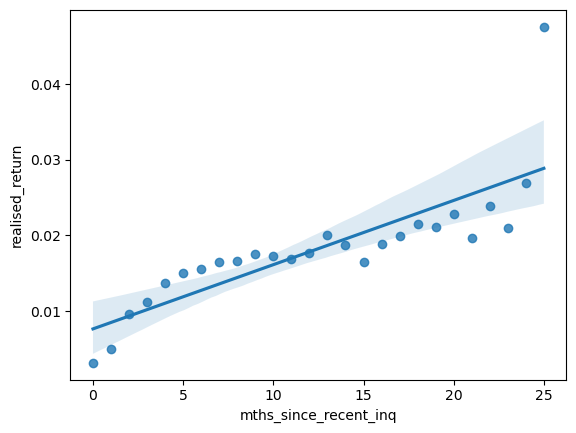

Slope: 0.0008494265436827051


In [206]:
grouped_data = all_year_19.groupby('mths_since_recent_inq')['realised_return'].mean()

# convert the grouped data to a dataframe and reset the index
grouped_df = pd.DataFrame(grouped_data).reset_index()

# plot the data with a line of best fit
sns.regplot(x='mths_since_recent_inq', y='realised_return', data=grouped_df)

# show the plot
plt.show()

# calculate the slope of the line of best fit
x = grouped_df['mths_since_recent_inq']
y = grouped_df['realised_return']
slope, intercept = np.polyfit(x, y, 1)
print('Slope:', slope)

In [207]:
all_year_19.realised_return[all_year_19.mths_since_recent_inq.isna()].mean()

0.02445373994339179

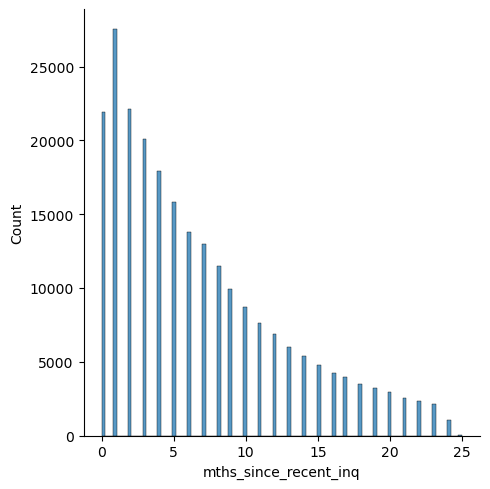

In [208]:
sns.displot(all_year_19['mths_since_recent_inq'])

In [209]:
all_year_19['mths_since_recent_inq'] = all_year_19['mths_since_recent_inq'].fillna(22.0)

#### We can understand that the N/A group is not considered risky because we can see that the mean realised_return for the N/A’s is relatively high (24%) and therefore we replaced the missing values with the closest value to this realized return, which is 22 (and the mean realised_return is 0.02376)

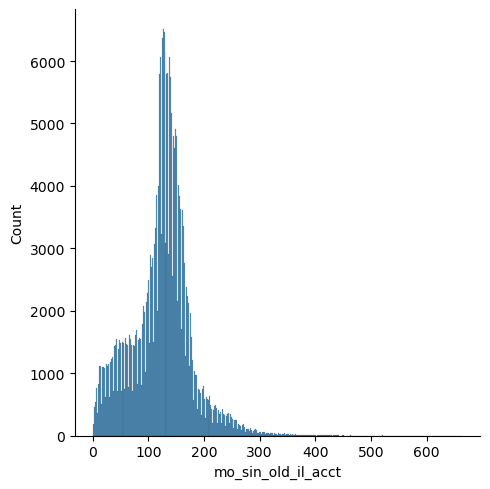

In [210]:
sns.displot(all_year_19['mo_sin_old_il_acct'])

In [211]:
all_year_19['mo_sin_old_il_acct'] = all_year_19['mo_sin_old_il_acct'].fillna(all_year_19['mo_sin_old_il_acct'].median())

The distribution of 'mo_sin_old_il_acct' is nearly normal, and the mean realised_return for the median is 0.01352 which is close to the mean realised_return of the N/A’s. Therefore we can replace the missing values with the median.

### Features we decided to put aside, we will reconsider including these features based on how our model performs:

In [212]:
all_year_19[all_year_19.columns[all_year_19.isna().sum()>0]].isna().sum()

mths_since_rcnt_il     8059
il_util               37140
dtype: int64

In [213]:
put_aside_columns = ['mths_since_rcnt_il','il_util','purpose','grade']

# Dealing with categorical features:

We decided to remove grade and turned  sub_grade to numeric values

In [214]:
grade_mappings = {
  'A1': 1.0,
  'A2': 1.2,
  'A3': 1.4,
  'A4': 1.6,
  'A5': 1.8,
  'B1': 2.0,
  'B2': 2.2,
  'B3': 2.4,
  'B4': 2.6,
  'B5': 2.8,
  'C1': 3.0,
  'C2': 3.2,
  'C3': 3.4,
  'C4': 3.6,
  'C5': 3.8,
  'D1': 4.0,
  'D2': 4.2,
  'D3': 4.4,
  'D4': 4.6,
  'D5': 4.8,
  'E1': 5.0,
  'E2': 5.2,
  'E3': 5.4,
  'E4': 5.6,
  'E5': 5.8,
  'F1': 6.0,
  'F2': 6.2,
  'F3': 6.4,
  'F4': 6.6,
  'F5': 6.8,
  'G1': 7.0,
  'G2': 7.2,
  'G3': 7.4,
  'G4': 7.6,
  'G5': 7.8
}
x = all_year_19.sub_grade.map(grade_mappings)


In [215]:
all_year_19['sub_grade'] = x

Slope: -0.01361964463650504


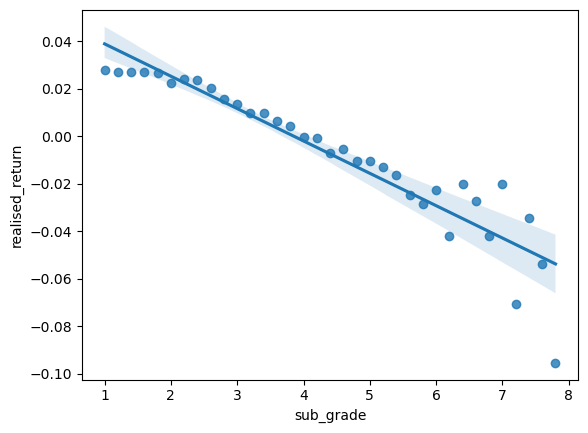

In [216]:
grouped_data = all_year_19.groupby('sub_grade')['realised_return'].mean()

# convert the grouped data to a dataframe and reset the index
grouped_df = pd.DataFrame(grouped_data).reset_index()

# plot the data with a line of best fit
sns.regplot(x='sub_grade', y='realised_return', data=grouped_df)

x = grouped_df['sub_grade']
y = grouped_df['realised_return']
slope, intercept = np.polyfit(x, y, 1)
print('Slope:', slope)


For 'Home_ownership' - Created 3 dummies: "OWN","MORTGAGE","RENT OR ANY" 

In [217]:
dummies = pd.get_dummies(all_year_19.home_ownership)
dummies["RENT or ANY"] = dummies["RENT"] | dummies["ANY"]
all_year_19 = pd.concat([all_year_19,dummies[["RENT or ANY","MORTGAGE","OWN",]]],axis=1)

In [218]:
dummy_columns = []
dummy_columns += ["RENT or ANY","MORTGAGE","OWN"]

For 'verification_status' - Created 3 dummies

In [219]:
all_year_19 = pd.concat([all_year_19,pd.get_dummies(all_year_19.verification_status)],axis=1)

In [220]:
dummy_columns += list(pd.get_dummies(all_year_19.verification_status).columns)

For earliest_cr_line - We calculated the number of years from 1.1.2016

In [221]:
def years_between(date) :
    diff=(datetime.strptime("01/01/2016",'%d/%m/%Y')-datetime.strptime(date,'%d/%m/%Y')).days/365    
    return np.round(diff,decimals=1)
    
# earliest_cr_line- make it years from.
all_year_19.earliest_cr_line = all_year_19.earliest_cr_line.apply(convert_date)
all_year_19.earliest_cr_line = all_year_19.earliest_cr_line.apply(years_between)

For initial_list_status - F=0 W=1

In [222]:
all_year_19.initial_list_status.replace(to_replace='f',value=0,inplace=True)
all_year_19.initial_list_status.replace(to_replace='w',value=1,inplace=True)

Taking care of and dropping more columns

In [223]:
# remove the percentage sign from the 'int_rate' column and convert it to floats
all_year_19['int_rate'] = all_year_19['int_rate'].str.rstrip('%').astype('float') / 100

In [224]:
cols_to_remove_cat = ['issue_d','funded_amnt','Qrtr']
cols_to_remove_na = ['mths_since_rcnt_il', 'il_util']

In [225]:
all_year_19 = all_year_19.drop(columns=cols_to_remove_cat)
all_year_19 = all_year_19.drop(columns=cols_to_remove_na)

In [226]:
correlation_matrix = all_year_19.corr()

# get boolean mask where correlation matrix is upper triangular matrix
# k=1 to exclude diagonal elements as well
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# get the elements where mask is False i.e lower triangular part of correlation matrix
correlation_matrix_where_mask = correlation_matrix.where(~mask)

# stack and reset index
correlation_pairs = correlation_matrix_where_mask.stack().reset_index()

# name columns of correlation_pairs DataFrame
correlation_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# drop rows where Variable1 and Variable2 are identical
correlation_pairs = correlation_pairs[correlation_pairs['Variable1'] != correlation_pairs['Variable2']]

# sort by Correlation
sorted_correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending=False)

# print sorted correlation pairs
# print(sorted_correlation_pairs.head(100))

In [227]:
# calculate correlation of all variables with 'realised_return'
correlation_with_target = all_year_19.corr()['realised_return']

# add two new columns to sorted_correlation_pairs DataFrame
sorted_correlation_pairs['Variable1_CorrWithTarget'] = sorted_correlation_pairs['Variable1'].map(correlation_with_target)
sorted_correlation_pairs['Variable2_CorrWithTarget'] = sorted_correlation_pairs['Variable2'].map(correlation_with_target)

# print updated DataFrame
print(sorted_correlation_pairs.head(100))

                       Variable1              Variable2  Correlation  \
64               fico_range_high         fico_range_low     1.000000   
1497                    num_sats               open_acc     0.998683   
3                    installment              loan_amnt     0.993008   
7                      sub_grade               int_rate     0.989828   
1478         num_rev_tl_bal_gt_0        num_actv_rev_tl     0.978296   
1850             tot_hi_cred_lim            tot_cur_bal     0.958519   
2041  total_il_high_credit_limit           total_bal_il     0.958169   
171                  total_pymnt              loan_amnt     0.912053   
173                  total_pymnt            installment     0.900141   
1916           total_bal_ex_mort           total_bal_il     0.890795   
2077  total_il_high_credit_limit      total_bal_ex_mort     0.878281   
718                      bc_util             revol_util     0.857768   
622         acc_open_past_24mths            open_rv_24m     0.84

In [228]:
columns_to_drop_corr = ['fico_range_low', 'open_acc', 'installment', 'num_rev_tl_bal_gt_0', 'tot_cur_bal', 'total_bal_il']
all_year_19 = all_year_19.drop(columns=columns_to_drop_corr)

Here we are creating two dataframes one that will be uses by numeric-only prediction models like linear regression,
The second dataframe will include the categorical values and not their dummy features to be used in models that can workon categorical features like decision trees.

In [229]:
final_df_numeric = all_year_19.drop(columns=['verification_status','grade','home_ownership'])

In [230]:
final_df_categorical = all_year_19.drop(columns = dummy_columns)

In [238]:
final_df_numeric.dtypes

loan_amnt                            float64
int_rate                             float64
sub_grade                            float64
emp_length                           float64
annual_inc                           float64
loan_status                           object
dti                                  float64
delinq_2yrs                          float64
earliest_cr_line                     float64
fico_range_high                      float64
inq_last_6mths                       float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc                            float64
initial_list_status                    int64
total_pymnt                          float64
last_pymnt_d                  datetime64[ns]
tot_coll_amt                         float64
open_acc_6m                          float64
open_act_il                          float64
open_il_12m                          float64
open_il_24

Writting the df to a csv document for use in models

In [239]:
file_name = 'numeric_dataframe.csv'
final_df_numeric.to_csv(file_name,index=False)

In [240]:
file_name = 'categoric_dataframe.csv'
final_df_categorical.to_csv(file_name,index=False)

In [8]:
gody = [1,2,8,4,5]
np.argmax(gody)

2